In [1]:
import statsmodels.formula.api as smf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [2]:
def read_list(name_list):
    df = pd.read_excel('Data.xlsx', sep = ',', sheet_name = name_list)
    return df

# def rename(df):
#     rename = { col: re.split(r' ', col)[0] for col in df.columns }
#     df.rename(columns=rename, inplace=True)
#     return df

def rename(df):
    rename = { df.columns[0]:'Country', df.columns[1]:'GDP_per_capita', df.columns[2]: 'Current_health_expenditure', \
               df.columns[3]: 'Domestic_general_government_health_expenditure', df.columns[4]: 'Life_expectancy' }
    df.rename(columns=rename, inplace=True)
    return df

list_name = ['Western Democracies', 'Asia', 'Latin America', 'Former Socialist', 'Middle East']
df_W, df_A, df_L, df_F, df_M = map( lambda _list: read_list(_list), list_name )

df = rename(df_W)

In [3]:
# df.head(3)

# Задание 1
## a)
*(расскажите ему что такое вектор)*

In [4]:
model = smf.ols(df.columns[4]+'~'+df.columns[1]+ '+' +df.columns[2]+ '+' +df.columns[3],data=df)
fitted = model.fit()
fitted.params

Intercept                                         84.060570
GDP_per_capita                                     0.000018
Current_health_expenditure                        -0.273304
Domestic_general_government_health_expenditure    -0.079976
dtype: float64

In [5]:
fitted.rsquared

0.36191903653554536

## Уравнение регрессии:
**Y_ожидаемое(Life_expectancy) = 84.060570 + 0.000018 X_1(GDP_per_capita) - 0.273304 X_2(Current_health_expenditure) - 0.079976 X_3(Domestic_general_government_health_expenditure)**

# Ответ:
##  $\overline{b}$ = ( 0.000018, -0.273304, -0.079976 )
##  $R^2$ = 0.36191903653554536

# b)
## мужик странный немног( говорит взять на один признак меньше, но какой именно он хочет выкинуть надо самим догадаться
## ок, мне третий не очень нравится 

In [6]:
model = smf.ols(df.columns[4]+'~'+df.columns[1]+'+'+df.columns[2],data=df)
fitted = model.fit()
fitted.params

Intercept                     83.751386
GDP_per_capita                 0.000018
Current_health_expenditure    -0.298226
dtype: float64

In [7]:
fitted.rsquared

0.34997395731273706

# Уравнение регрессии:
**Y_ожидаемое(Life_expectancy) = 83.751386 + 0.000018 X_1(GDP_per_capita) - 0.298226 X_2(Current_health_expenditure)**

# Ответ:
##  $\overline{b}$ = ( 0.000018, -0.298226 )
##  $R^2$ = 0.34997395731273706

# с)
## опять подключаю рандом и выкидываю второй признак

In [8]:
model = smf.ols(df.columns[4]+'~'+df.columns[1],data=df)
fitted = model.fit()
fitted.params

Intercept         81.122668
GDP_per_capita     0.000009
dtype: float64

In [9]:
fitted.rsquared

0.02384301849682824

# Уравнение регрессии:
**Y_ожидаемое(Life_expectancy) = 81.122668 + 0.000009 X_1(GDP_per_capita)**

# Ответ:
##  $\textit{b}$ = 0.000009
##  $R^2$ = 0.02384301849682824

# d)

In [10]:
columns_name = [ df.columns[i] for i in range(1, 5)]
df[columns_name].corr()

,GDP_per_capita,Current_health_expenditure,Domestic_general_government_health_expenditure,Life_expectancy
GDP_per_capita,1.000000,0.231599,0.122092,0.154412
Current_health_expenditure,0.231599,1.000000,0.414644,-0.519790
Domestic_general_government_health_expenditure,0.122092,0.414644,1.000000,-0.307373
Life_expectancy,0.154412,-0.519790,-0.307373,1.000000


# Ответ это табличка сверху
**Надеюсь мы с ним под матрицей корреляций одно и тоже понимае**

*(я вывел матрицу корреляции Пирсона)*

#  

# Задание 2
## а)

In [11]:
df_standardized = preprocessing.scale(df.drop(['Country'], axis=1))
df_standardized = pd.DataFrame(df_standardized)
rename_new = { df_standardized.columns[i]: df.columns[i+1] for i in range(4) }
df_standardized.rename(columns=rename_new, inplace=True)
df = pd.merge(df['Country'], df_standardized, right_index=True, left_index=True)
df

,Country,GDP_per_capita,Current_health_expenditure,Domestic_general_government_health_expenditure,Life_expectancy
0,Australia,0.373606,-0.450756,-0.554736,0.845750
1,Austria,-0.083721,0.102739,0.243189,-0.405905
2,Belgium,-0.227122,0.056665,0.561666,-0.610308
3,Canada,0.072487,0.177849,0.470238,0.328433
4,Denmark,0.707465,0.028825,0.998962,-0.910604
5,Finland,-0.217595,-0.246092,0.255792,-0.105608
6,France,-0.461610,0.676331,1.121215,0.764998
7,Germany,-0.238535,0.481296,0.944001,-0.973691
8,Greece,-1.662863,-1.094552,-1.733428,-0.564885
9,Iceland,-0.107831,-1.061711,-0.392532,0.916408


# Ответ это табличка сверху

# b)

In [12]:
model = smf.ols(df.columns[4]+'~'+df.columns[1]+'+'+df.columns[2]+'+'+df.columns[3],data=df)
fitted = model.fit()
print(fitted.params, fitted.rsquared)

Intercept                                         1.498801e-15
GDP_per_capita                                    2.936787e-01
Current_health_expenditure                       -5.379835e-01
Domestic_general_government_health_expenditure   -1.201571e-01
dtype: float64 0.36191903653554247


In [13]:
model = smf.ols(df.columns[4]+'~'+df.columns[1]+'+'+df.columns[2],data=df)
fitted = model.fit()
print(fitted.params, fitted.rsquared)

Intercept                     1.484923e-15
GDP_per_capita                2.903698e-01
Current_health_expenditure   -5.870396e-01
dtype: float64 0.3499739573127365


In [14]:
model = smf.ols(df.columns[4]+'~'+df.columns[1],data=df)
fitted = model.fit()
print(fitted.params, fitted.rsquared)

Intercept         1.484923e-15
GDP_per_capita    1.544118e-01
dtype: float64 0.023843018496828017


## Уравнения регрессии:
**Y_ожидаемое(Life_expectancy) = 1.498801e-15 + 2.936787e-01 X_1(GDP_per_capita) - 5.379835e-01 X_2(Current_health_expenditure) - 1.201571e-01 X_3(Domestic_general_government_health_expenditure)**

**Y_ожидаемое(Life_expectancy) = 1.484923e-15 + 2.903698e-01 X_1(GDP_per_capita) - 5.870396e-01 X_2(Current_health_expenditure)**

**Y_ожидаемое(Life_expectancy) = 1.484923e-15 + 1.544118e-01 X_1(GDP_per_capita)**

# Ответ:
##  $\overline{b}$ = ( 2.936787e-01, -5.379835e-01, -1.201571e-01 )
##  $R^2$ = 0.36191903653554247

##  $\overline{b}$ = ( 2.903698e-01, -5.870396e-01 )
##  $R^2$ = 0.3499739573127365

##  $\textit{b}$ = 1.544118e-01
##  $R^2$ = 0.023843018496828017

*(Я так понял, что "b" из первого задания и "$\beta$" из второго у него одно и то же)*

# c)
**Чот не понятно что сравнивать( задание максимально стремное**

# Ответ:
##  При переходе от трех к двум переменным модуль $\overline{b}$ совсем немного увеличился и резко уменьшился для одной переменной

# d)

In [15]:
columns_name = [ df.columns[i] for i in range(1, 5)]
df[columns_name].corr()

,GDP_per_capita,Current_health_expenditure,Domestic_general_government_health_expenditure,Life_expectancy
GDP_per_capita,1.000000,0.231599,0.122092,0.154412
Current_health_expenditure,0.231599,1.000000,0.414644,-0.519790
Domestic_general_government_health_expenditure,0.122092,0.414644,1.000000,-0.307373
Life_expectancy,0.154412,-0.519790,-0.307373,1.000000


# e)
**Я так и не понял, что такое диаграммы рассеяния с линиями тренда, но поробуй ему вставить графики эти**

*Он просит вас какие-то связи искать, корреляцию и тд, хотя по критерию Фишера это независимые данные, так что мб прокатит*

Intercept         1.484923e-15
GDP_per_capita    1.544118e-01
dtype: float64


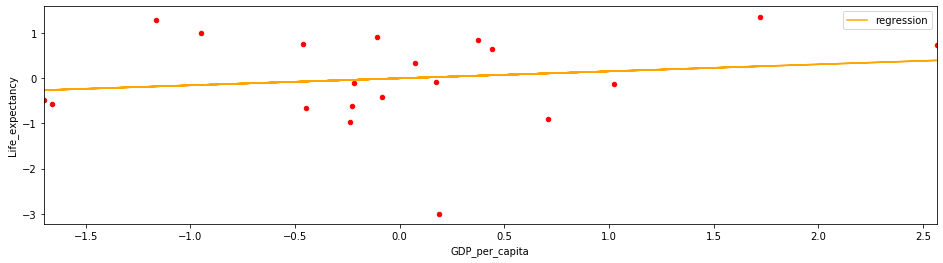

In [16]:
model = smf.ols(df.columns[4]+'~'+df.columns[1],data=df)
fitted = model.fit()
print(fitted.params)

df['regression'] = fitted.params[0] + fitted.params[1]*df[df.columns[1]]

fig = plt.figure(figsize=(16,4))
ax = plt.subplot()

df.plot.scatter(df.columns[1],df.columns[4], ax = ax, color='red')
df.plot.line(df.columns[1],'regression', ax = ax, color = 'orange')

Intercept                     1.484923e-15
Current_health_expenditure   -5.197901e-01
dtype: float64


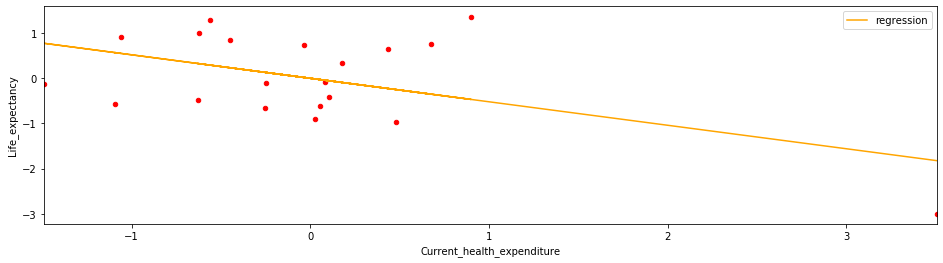

In [17]:
model = smf.ols(df.columns[4]+'~'+df.columns[2],data=df)
fitted = model.fit()
print(fitted.params)

df['regression'] = fitted.params[0] + fitted.params[1]*df[df.columns[2]]

fig = plt.figure(figsize=(16,4))
ax = plt.subplot()

df.plot.scatter(df.columns[2],df.columns[4], ax = ax, color='red')
df.plot.line(df.columns[2],'regression', ax = ax, color = 'orange')

Intercept                                         1.484923e-15
Domestic_general_government_health_expenditure   -3.073732e-01
dtype: float64


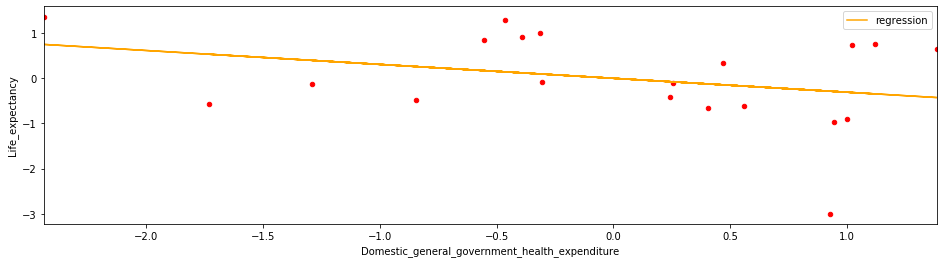

In [18]:
model = smf.ols(df.columns[4]+'~'+df.columns[3],data=df)
fitted = model.fit()
print(fitted.params)

df['regression'] = fitted.params[0] + fitted.params[1]*df[df.columns[3]]

fig = plt.figure(figsize=(16,4))
ax = plt.subplot()

df.plot.scatter(df.columns[3],df.columns[4], ax = ax, color='red')
df.plot.line(df.columns[3],'regression', ax = ax, color = 'orange')

df = df.drop(['regression'], axis=1)

# Задание 3
## a)

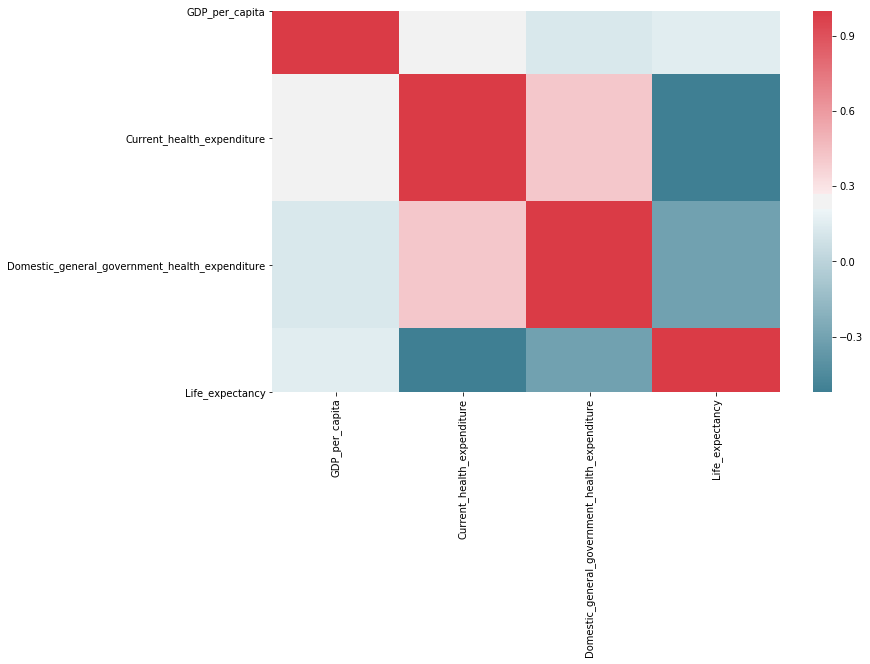

In [19]:
import seaborn as sns 
f, ax = plt.subplots(figsize=(12, 7)) 
corr = df.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax) 

*Можно табличку верхнюю прикрепить, чтоб по красоте все было, но это не обязательно*
# Ответ:
##  На зависимую переменную сильнее всего влияет "GDP_per_capita" и меньше всего "Current_health_expenditure"

# b)

# Ответ:
##  Посмотрев на $R^2$ при различном количестве переменных видно, что при переходе от двух к трем переменным результат регрессии совсем немного изменяется в худшую стророну, но когда переменная остается только одна качество регрессии сильно падает